In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(37)

In [3]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='training_loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, max(history.history['loss'])+10])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [4]:
file = "path/to/file"
array = np.genfromtxt(file, delimiter=",")

In [5]:
array.shape

(155, 12)

In [6]:
array[11][5:10], array[11]

(array([8.20000000e+01, 2.40000000e+01, 7.90000000e+01, 5.90000000e+01,
        5.48271752e-02]),
 array([7.00000000e+00, 1.08576000e+02, 5.33160000e+01, 3.33100000e+00,
        9.79000000e+01, 8.20000000e+01, 2.40000000e+01, 7.90000000e+01,
        5.90000000e+01, 5.48271752e-02, 8.70000000e+01, 9.30000000e+01]))

In [7]:
RATIO = 0.95 # train+validation / total
VAL_RATIO = 0.4 / RATIO
n_samples = array.shape[0]
len_train = int(n_samples*RATIO)
X_train = array[:len_train,:11]
Y_train = array[:len_train,11]
X_test = array[len_train:, :11]
Y_test = array[len_train:, 11]

In [8]:
y_train = np.zeros((Y_train.shape[0], 100))
y_train[np.arange(Y_train.shape[0]), Y_train.astype(int)-1] = 1

In [9]:
y_test = np.zeros((Y_test.shape[0], 100))
y_test[np.arange(Y_test.shape[0]), Y_test.astype(int)-1] = 1

In [10]:
y_train[1].argmax(), y_train[1][20]

(20, 1.0)

In [11]:
model = Sequential([
    BatchNormalization(axis=-1, input_shape=(11, )),
    Dense(32, activation="tanh"),
    Dense(100, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

/Users/daniele/miniforge3/envs/tf/lib/python3.9/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │         3,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,728 (14.56 KB)

 Trainable params: 3,706 (14.48 KB)

 Non-trainable params: 22 (88.00 B)

In [12]:
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split=VAL_RATIO)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6450 - val_loss: 4.9168
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5346 - val_loss: 4.8137
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4527 - val_loss: 4.8023
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3721 - val_loss: 4.8026
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2905 - val_loss: 4.7966
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2067 - val_loss: 4.7904
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1199 - val_loss: 4.7878
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0294 - val_loss: 4.7928
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9348 - val_loss: 4.8076
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8367 - val_loss: 4.8291
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 3.7359 - val_loss: 4.8538
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3

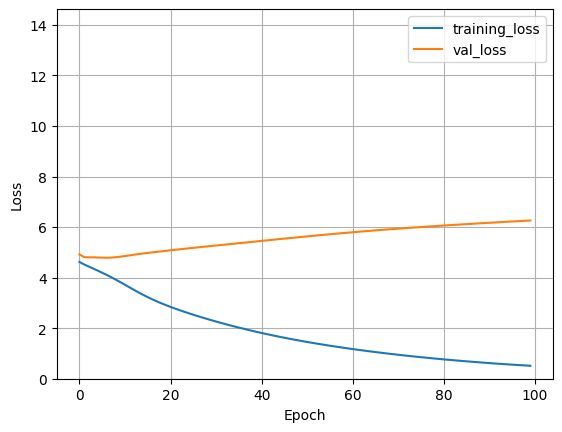

In [13]:
plot_loss(history)

In [14]:
loss = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.1033


In [15]:
model.predict(X_test)[0].argmax(), y_test[0].argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


(20, 13)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


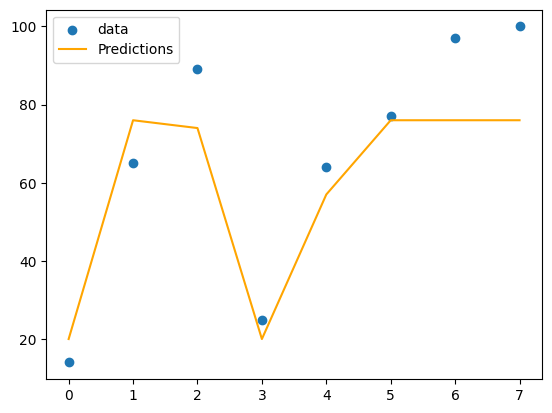

In [17]:
x = [i for i in range(0, len(Y_test))]
predictions = model.predict(X_test)
plt.scatter(x, Y_test, label="data")
plt.plot(x, [_.argmax() for _ in predictions], label="Predictions", color="orange")
plt.legend()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


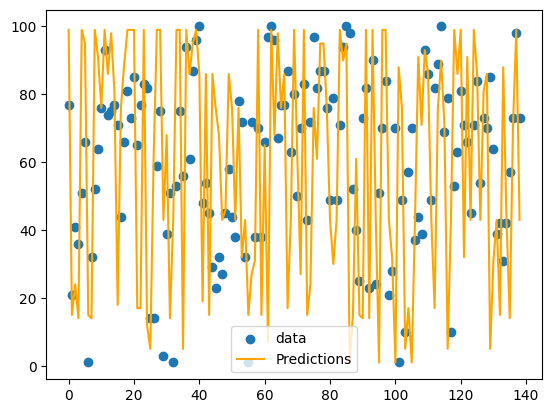

In [25]:
x = [i for i in range(0, len(Y_train))]
predictions = model.predict(X_train)
plt.scatter(x, Y_train, label="data")
plt.plot(x, [_.argmax() for _ in predictions], label="Predictions", color="orange")
plt.legend()